In [ ]:
# Delaying tasks
#
# El computo paralelo usa lo que es llamado como 'lazy' evaluacion,
# esto significa que el framework va a poner en una pila de ejecucion 
# las tranformaciones o calculos para cuando esten listas para correr en
# paralelo, una de las observaciones es que el framework no evaluara 
# la operacion o transformacion hasta que explicitamente le menciones hacerlo,
# esto difiere de la evaluacion 'eager' la cual se ejecuta una vez llamado el
# metodo o la transformacion, uno de las usos de las variables delay es
# para mantener la ejecucion de la variable solo hasta que esta sea 
# explicitamente necesaria en problemas como el un calculo hasta que un proceso
# termine o espere a que ocurra una transformacion

# Uso de delay en datos masivos
# Uno de los usos mas comunes en datos masivos seria la lectura de una tabla o
# un archivo muy grande el cual diferentes partes del proceso necesitan de el 
# y realizan diferentes transformaciones en este. ya que una tabla de una base
# de datos o un archivo podria verse afectado por la lectura y escritura en 
# paralelo.








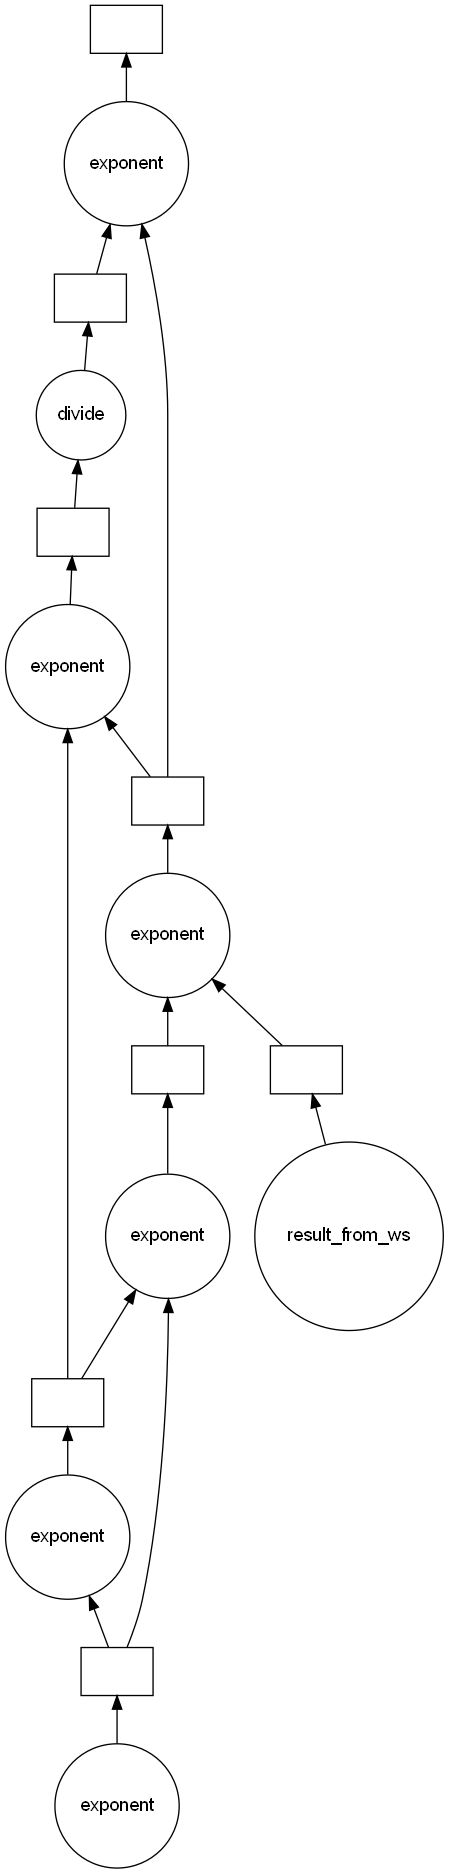

In [5]:
import dask
import time

@dask.delayed
def exponent(x, y):
    '''Define a lazily evaluating function'''
    return x ** y

@dask.delayed
def sum_result(res1, res2):
    return res1 + res2

@dask.delayed
def result_from_ws():
    ##simulate result is from WS
    time.sleep(10)
    return 100

@dask.delayed
def divide(x, n):
    return x/n
    
# Function returns a delayed object, not computation
x = exponent(4, 5)
y = exponent(x,4)
result_from_ws = result_from_ws()
z = exponent(x,y)
a = exponent(z, result_from_ws)
b = exponent(y , a)
c = divide(b, 2)
d = exponent(c,a)
d.visualize(filename = None)

In [16]:
import pandas as pd
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
# Sklearn modules & classes
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics
df = pd.read_csv('iris.csv')

In [21]:
# Create training and test split
X = df[['sepallength', 'sepalwidth', 'petallength', 'petalwidth']]
y = df[['class']]
y = np.squeeze(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [23]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [43]:
# Instantiate the Support Vector Classifier (SVC)
import dask.delayed as delayed
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
svc = SVC(C=1.0, random_state=1, kernel='linear')
 
# Fit the model using SVM
fit_svm = delayed(svc.fit(X_train_std, y_train))

# Fit the model using RF
rf = RandomForestClassifier()
fit_rf = delayed(rf.fit(X_train_std, y_train))

# Fit the model using DT 
clf = DecisionTreeClassifier()
fit_clf = delayed(clf.fit(X_train_std,y_train))


In [56]:
# Make the predictions
import numpy as np
fit_rf.compute()
fit_clf.compute()
fit_svm.compute()
@dask.delayed
def predict_assemble(X_test_std):
    original_class = 'Iris-virginica'
    y_predict = svc.predict([X_test_std[0]])
    y_predict_dt = clf.predict([X_test_std[0]])
    y_predict_rf = rf.predict([X_test_std[0]])
    arr_predictions = np.array([y_predict, y_predict_dt, y_predict_rf]).flatten()
    res = " ".join(str(x) for x in arr_predictions)
    if res.count(original_class) > 2:
        return True
    return False

predict_assemble(X_test_std).compute()

True